# **Linear Discriminant Analysis (LDA)**

In [ ]:
import numpy as np

#define the data points for both classes
X1 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]])
X2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

#compute the mean of each class
mean_X1 = np.mean(X1, axis=0)
mean_X2 = np.mean(X2, axis=0)

#compute the within-class scatter matrix
S_W = np.zeros((2,2))
for x in X1:
  S_W += np.dot((x - mean_X1).reshape(2,1), (x - mean_X1).reshape(1,2))
for x in X2:
  S_W += np.dot((x - mean_X2).reshape(2,1), (x - mean_X2).reshape(1,2))

#compute the between-class scatter matrix
mean_diff = (mean_X1 - mean_X2 ).reshape(2,1)
S_B = np.dot(mean_diff, mean_diff.T)

#Solve the generalized eigen value problem for the matrix inv(S_W)*S_B
eigvals , eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

#select the eigenvector with the largest eigen value ( this is the direction of )
w = eigvecs[:, np.argmax(eigvals)]

#project the data onto the new axis
X1_lda = X1.dot(w)
X2_lda = X2.dot(w)

#output the results
print("Projection Vector (W): ",w)
print("Class w1 projected data: ",X1_lda)
print("Class w2 projected data: ",X2_lda)


Projection Vector (W):  [0.90878558 0.41726342]
Class w1 projected data:  [4.46966918 3.48662485 3.06936143 5.22993727 5.30419602]
Class w2 projected data:  [12.35170446  8.79082087 10.26538736 10.19112861 12.4259632 ]


In [ ]:
import numpy as np

#define the data points for both classes
X1 = np.array([[5,3],[4,5],[4,2],[6,5],[7,3]])
X2 = np.array([[10,12],[11,8],[12,10],[9,11],[13,9]])

#compute the mean of each class
mean_X1 = np.mean(X1, axis=0)
mean_X2 = np.mean(X2, axis=0)

#compute the within-class scatter matrix
S_W = np.zeros((2,2))
for x in X1:
  S_W += np.dot((x - mean_X1).reshape(2,1), (x - mean_X1).reshape(1,2))
for x in X2:
  S_W += np.dot((x - mean_X2).reshape(2,1), (x - mean_X2).reshape(1,2))

#compute the between-class scatter matrix
mean_diff = (mean_X1 - mean_X2 ).reshape(2,1)
S_B = np.dot(mean_diff, mean_diff.T)

#Solve the generalized eigen value problem for the matrix inv(S_W)*S_B
eigvals , eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

#select the eigenvector with the largest eigen value ( this is the direction of )
w = eigvecs[:, np.argmax(eigvals)]

#project the data onto the new axis
X1_lda = X1.dot(w)
X2_lda = X2.dot(w)

#output the results
print("Projection Vector (W): ",w)
print("Class w1 projected data: ",X1_lda)
print("Class w2 projected data: ",X2_lda)


Projection Vector (W):  [-0.69572904 -0.71830432]
Class w1 projected data:  [-5.63355818 -6.37443778 -4.21952482 -7.76589587 -7.02501627]
Class w2 projected data:  [-15.57694229 -13.39945405 -15.53179173 -14.16290893 -15.50921646]


Accuracy: 1.00


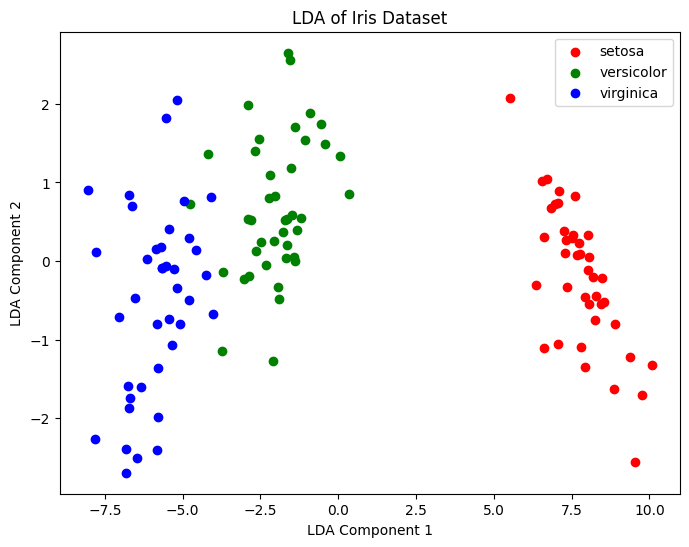

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply LDA to reduce the dimensionality to 2 components
lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train_lda, Y_train)

# Predict on the test data
Y_pred = classifier.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the transformed training data
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train_lda[Y_train == i, 0], X_train_lda[Y_train == i, 1], label=target_name)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(loc='best')
plt.title('LDA of Iris Dataset')
plt.show()
